ช่วง 7 วันอันตราย เป็นช่วงที่เกิดอุบติเหตุมากกว่าปกติ จริงหรือไม่ <br>
การทดลองนี้ทำการทดสอบอย่างง่าย เพื่อตอบคำถามข้างต้น <br>
อาศัยข้อมูลจาก ศูนย์ข้อมูลอุบัติเหตุ Thai Rsc (http://rvpreport.rvpeservice.com/viewrsc.aspx?report=0486&session=16)

In [84]:
%matplotlib inline

import requests
import pandas as pd
from StringIO import StringIO
import statsmodels.api as sm

In [57]:
r = requests.get('https://docs.google.com/feeds/download/spreadsheets/Export?key=1ck74o6FUXPWSH2YW4Q-VMjvvXQ_hKu9RHugAKfOBYM4&exportFormat=csv&gid=0')
data = r.content

In [58]:
df = pd.read_csv(StringIO(data))

In [59]:
df.head()

,year,month,disabled,injured,dead
0,2010,1,68,25350,747
1,2010,2,55,24938,668
2,2010,3,58,26318,756
3,2010,4,55,25271,754
4,2010,5,66,24308,653


ค่าเฉลี่ยของการเกิดอุบัติเหตุในแต่ละเดือน ตั้งแต่ปี 2010 - 2015

In [111]:
for month in range(1, 13):
    print "month = %d: %.2f" % (month, df[df['month']==month].describe()['dead']['mean'])

month = 1: 732.67
month = 2: 689.67
month = 3: 746.33
month = 4: 704.83
month = 5: 628.17
month = 6: 626.83
month = 7: 647.33
month = 8: 617.17
month = 9: 598.83
month = 10: 679.83
month = 11: 758.33
month = 12: 877.33


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cb557d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d6e4090>]], dtype=object)

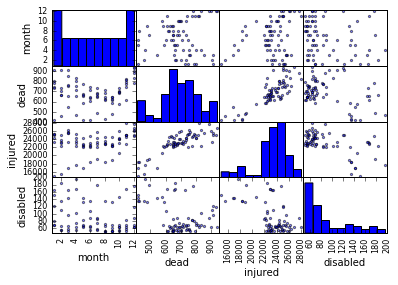

In [122]:
fig = plt.figure()
fig.plot()
pd.scatter_matrix(df[['month', 'dead', 'injured', 'disabled']])

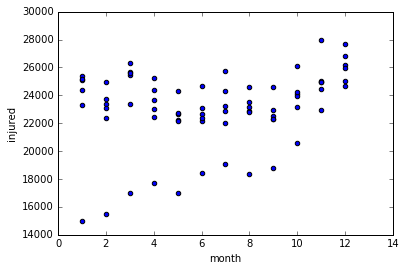

In [118]:
df.plot(kind='scatter', y='injured', x='month')

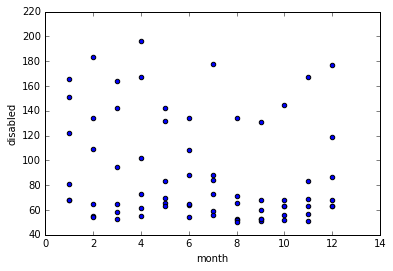

In [119]:
df.plot(kind='scatter', y='disabled', x='month')

ทดสอบความแตกต่างระหว่างค่าเฉลี่ยของการเกิดอุบัติเหตุในช่วงวันสงกรานต์ <br>
โดยเปรียบเทียบค่าเฉลี่ยของการเกิดอุบัติเหตุในเดือนเมษายนกับเดือนอื่นๆ <br>
(test statistic - ttest independent sample)

In [112]:
for month in range(1, 13):
    print "1th month with %dth month %f(p-value) " % (month, sm.stats.ttest_ind(df[df['month']==4]['dead'], df[df['month']==month]['dead'], 'two-sided')[1])

1th month with 1th month 0.754529(p-value) 
1th month with 2th month 0.852119(p-value) 
1th month with 3th month 0.596587(p-value) 
1th month with 4th month 1.000000(p-value) 
1th month with 5th month 0.316161(p-value) 
1th month with 6th month 0.298966(p-value) 
1th month with 7th month 0.386474(p-value) 
1th month with 8th month 0.223249(p-value) 
1th month with 9th month 0.105931(p-value) 
1th month with 10th month 0.676543(p-value) 
1th month with 11th month 0.410955(p-value) 
1th month with 12th month 0.015216(p-value) 


ผลข้างต้น พบว่า ค่าเฉลี่ยของการเกิดอุบัติเหตุในเดือน เมษายน ไม่มีความแตกต่างอย่างมีนัยสำคัญทางสถิติเมื่อเทียบกับเดือนอื่นๆ ยกเว้นเดือน ธันวาคม